In [621]:
#Importing needed modules.
from pandas import read_csv
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers , models
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#instancing from 'Tokenizer' and 'LabelEncoder' objects.
tokenizer = Tokenizer(oov_token='<00U00>')
encoder = LabelEncoder()

In [622]:
#Reading file and getting ten samples from that randomly.
path = "D:\\datasets\\Airline_reviews2\\Airline_Reviews.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
6931,6931,China Eastern Airlines,1,"""devastated and disappointed""",19th December 2019,True,Sydney to Rome via Shanghai. First of all i ...,NaN,Couple Leisure,Economy Class,Sydney to Rome via Shanghai,December 2019,1.0,1.0,1.0,1.0,1.0,NaN,1.0,no
9728,9728,flybe,1,"""very happy with the flight and service""",20th August 2022,True,Flew Flybe on the Belfast to Amsterdam route...,Dash-8,Solo Leisure,Economy Class,Belfast to Amsterdam,August 2022,5.0,5.0,5.0,5.0,NaN,NaN,5.0,yes
21022,21022,TUIfly,3,"""Just bad practices""",1st September 2019,True,Heraklion to Brussels. How to make extra mon...,NaN,Solo Leisure,Economy Class,Heraklion to Brussels,October 2018,3.0,3.0,NaN,3.0,NaN,NaN,2.0,no
6754,6754,Cebu Pacific,1,"""The worst customer service""",15th September 2022,True,Worst customer service. we were traveling to...,NaN,Couple Leisure,Economy Class,Tacloban to Manila,September 2022,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
11277,11277,Iberia Express,6,"""half hearted business class """,4th September 2017,False,Madrid to Dublin August 31st. Have flown wit...,A320,Solo Leisure,Business Class,Madrid to Dublin,August 2017,1.0,3.0,2.0,4.0,1.0,1.0,3.0,yes
6748,6748,Cebu Pacific,2,"""attitude just humiliated us""",14th October 2022,True,Our experience with the company is simply te...,NaN,Couple Leisure,Economy Class,Cebu to Surigao,October 2022,1.0,1.0,3.0,1.0,1.0,4.0,1.0,no
15123,15123,Nok Air,1,"""how they perform in a crisis""",27th February 2016,False,Flew Nok Air from Chiang Mai to Bangkok (havin...,NaN,Solo Leisure,Economy Class,CNX to DMG,February 2016,4.0,4.0,2.0,1.0,NaN,NaN,3.0,yes
14256,14256,Luxair,n,Luxair customer review,5th August 2004,False,Luxembourg - London City return. On a route wh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
16279,16279,Porter Airlines,1,"""will never use this airline again""",16th November 2019,False,Since I never received a Boarding Pass due t...,NaN,Solo Leisure,Economy Class,Washington DC to Montreal,November 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
14581,14581,Malindo Air,1,"""absolutely absurd airline""",28th November 2019,False,Delhi to Kuala Lumpur. The airline refused o...,NaN,Couple Leisure,Economy Class,Delhi to Kuala Lumpur,November 2019,2.0,1.0,NaN,1.0,3.0,1.0,1.0,no


In [623]:
#Getting information .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [624]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [625]:
#Seperating features and classes.
features = [Filter(text) for text in df.Review]
label = encoder.fit_transform(df.Recommended).reshape(-1,1)

In [626]:
#Tokinzing features and make a matrix from them.
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=300)

In [628]:
#Splitting dataset to train and validation sets.
xtr , xts , ytr , yts = train_test_split(matrix[:20000],label[:20000],test_size=0.05,random_state=0)

In [629]:
print(f'There are {len(xtr)} samples in train set and {len(xts)} samples in test set .')

There are 19000 samples in train set and 1000 samples in test set .


In [630]:
#Building a model.
model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,2,input_length=300),
                           layers.Dropout(0.45),
                           layers.Flatten(),
                           layers.Dense(2,activation='relu'),
                           layers.Dense(1,activation='sigmoid')])
model.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [631]:
#Data train.
history = model.fit(xtr,ytr,epochs=30,validation_data=(xts,yts))

Epoch 1/30
594/594 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7364 - val_loss: 0.3567 - val_accuracy: 0.8700
Epoch 2/30
594/594 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.8676 - val_loss: 0.2684 - val_accuracy: 0.8980
Epoch 3/30
594/594 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.8890 - val_loss: 0.2466 - val_accuracy: 0.9060
Epoch 4/30
594/594 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.8995 - val_loss: 0.2305 - val_accuracy: 0.9150
Epoch 5/30
594/594 [==============================] - 1s 2ms/step - loss: 0.2461 - accuracy: 0.9042 - val_loss: 0.2261 - val_accuracy: 0.9180
Epoch 6/30
594/594 [==============================] - 1s 2ms/step - loss: 0.2385 - accuracy: 0.9068 - val_loss: 0.2227 - val_accuracy: 0.9190
Epoch 7/30
594/594 [==============================] - 1s 2ms/step - loss: 0.2332 - accuracy: 0.9120 - val_loss: 0.2187 - val_accuracy: 0.9220
Epoch 

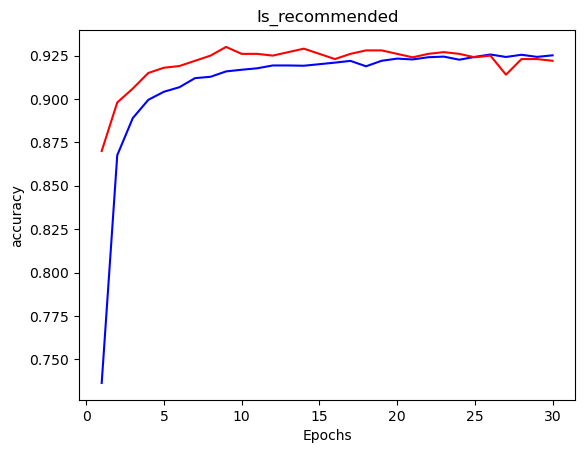

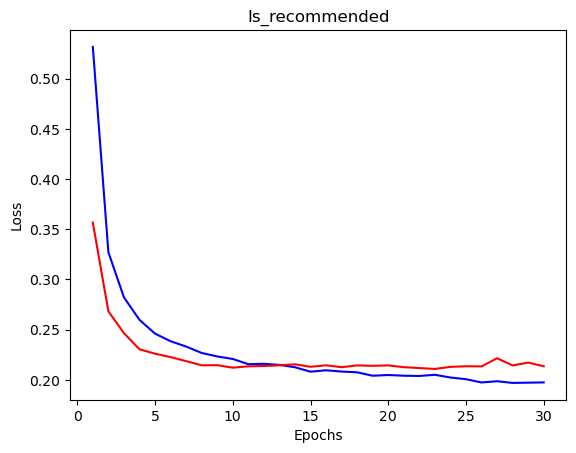

In [632]:
#Visualize models performance
epoch = range(1,len(history.epoch)+1)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Is_recommended')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Is_recommended')
plt.show()